The goal of this exercise is to code a simple neural network from scratch. We will create a simple network with the following architecture to solve the XOR problem. 

<img height="365" src="https://lh5.googleusercontent.com/Yinkr_2dkb08Mz_wzG-tPzqNGeQ3KnW4fuE7IwGzUjRV1a1-NjzuPS6s69rq-xtZYT26BuyzYgKO6ZRTetYqwAyhqK6W8BeePtOx33W-XgHA0BfkU8TzkcG53gmsHYLS2PT0Sbmv" width="557">

We will
* learn how to initialize neuron weights
* learn how to 'forward propagate' data through our network
* learn how to 'back propagate' loss information back through our network
* and use this information to update our network neuron weights

<br><br><br>
Python / notebook cheatsheet
* `Shift+Enter` to execute a given cell and move to / make a new next cell
* `#` is for single line comments
* each cell in this notebook can be either of type `code` (the cell below) or type `markdown` (this cell)
* tabs (indents) are required for any flow control (`for`, `if..else`, `while` etc)
* `=` is for assignment
* `()` is to call a function or method
* `[]` is for indexing into a variable
* a quick way to post-hoc to put parenthesis or brackets around something, just select that something and type `(` or `[`

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [33]:
RAND_WEIGHT_FACTOR = 0.5

# Training data
XOR_INPUTS = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
XOR_OUTPUTS = np.array([0.1, 0.9, 0.9, 0.1])

neuron_id = 0

(-2, 2)

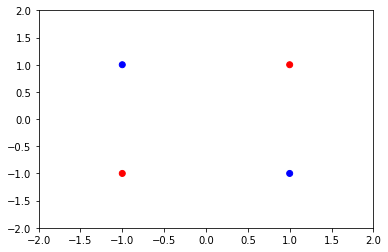

In [34]:
# visualize the training data
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(XOR_INPUTS[:,0],XOR_INPUTS[:,1],c=np.round(XOR_OUTPUTS),cmap=cm_bright)
plt.xlim([-2,2])
plt.ylim([-2,2])

In [ ]:
class Neuron:
    '''
    Neuron for backpropagation
    IMPORTANT: This is built for educational pourposes, efficiency is not a concern.
    '''
    def __init__(self, input_neurons=list()):
        ''' Initialzie parameters '''
        global neuron_id
        self.id = neuron_id
        neuron_id += 1
        self.fan_in = len(input_neurons)
        self.out = 0.0
        self.input_neurons = input_neurons
        self.reset_delta_w()
        self.delta = 0
        self.delta_sum = 0
        self.w = # TODO: Initialize weights

    def backprop(self):
        ''' Perform a back-propagation '''
        self.delta = self.delta_sum * self.phi_prime()
        for i, n in enumerate(self.input_neurons):
            # TODO: Back-propagate deltas
            self.delta_w[i] += n.out * self.delta

    def calc(self):
        ''' Calculate neuron's output '''
        self.delta = 0
        self.delta_sum = 0
        ins = np.array([n.out for n in self.input_neurons])
        # TODO: Calculate neuron's output

    def phi(self, h):
        ''' Neuron's transfer function '''
        return 1.0 / (1.0 + math.exp(-h))

    def phi_prime(self):
        ''' Neuron's transfer function derivate '''
        return # TODO: Calculate transfer's function derivate

    def reset_delta_w(self):
        self.delta_w = np.zeros((self.fan_in)) # Weight update

    def update_w(self, eta):
        ''' Update weights '''
        # TODO: Update weights

    def __str__(self):
        return f"id: {self.id}, output: {self.out}, weights: {self.w}, delta: {self.delta}, delta_sum: {self.delta_sum}, delta_w: {self.delta_w}"

In [ ]:
class Network:
    ''' A neural network to solve the XOR problem '''
    def __init__(self, data_in, data_out):
        ''' Create a fully connected network to solve XOR problem, return layers of neurons '''
        self.data_in = data_in
        self.data_out = data_out
        # Create 'bias'
        bias = Neuron()
        bias.out = 1.0
        # Create 'placeholders' for inputs
        in1 = Neuron()
        in2 = Neuron()
        # Create neurons and connect them
        n1 = Neuron([bias, in1, in2])
        n2 = Neuron([bias, in1, in2])
        self.n_out = Neuron([bias, n1, n2])
        # Create layers
        self.layers = [[in1, in2], [n1, n2], [self.n_out]]
        self.neurons = [n for l in self.layers[1:] for n in l]

    def backprop(self, num_in):
        ''' Back-propagate weights '''
        # Calculate output delta
        diff_loss = (self.data_out[num_in] - self.n_out.out)
        self.n_out.delta_sum = -diff_loss
        # Backpropagation
        for n in reversed(self.neurons):
            n.backprop()
        return diff_loss * diff_loss

    def calc(self):
        ''' Calculate outputs for all neurons (forward propagation) '''
        for n in self.neurons:
            n.calc()

    def evaluate(self):
        ''' Evaluate network for each input '''
        l0 = self.layers[0]
        num_samples = self.data_in.shape[0]
        for i in range(num_samples):
            self.set_inputs(i)
            self.calc()
            print(f"{l0[0].out}\t{l0[1].out}\t=>\t{self.n_out.out}")

    def set_inputs(self, num_in):
        ''' Set netwok inputs with sample number 'num_in' '''
        for j, n_in in enumerate(self.layers[0]):
            n_in.out = self.data_in[num_in, j]

    def train(self, eta):
        ''' Train a neural network (one iteration) '''
        sum_loss = 0.0
        num_samples = self.data_in.shape[0]
        n_out = self.layers[2][0]
        for n in self.neurons:
            n.reset_delta_w()
        # For each input sample...
        for i in range(num_samples):
            self.set_inputs(i)
            self.calc()
            sum_loss += self.backprop(i)
        # Update weights
        for n in self.neurons:
            n.update_w(eta)
        # Return loss
        loss = sum_loss / (2.0 * num_samples)
        return loss

In [ ]:
# Create a network
net = Network(XOR_INPUTS, XOR_OUTPUTS)

# Train
eta = 1
nIter = 2000
losses = np.zeros((nIter,))
for i in range(nIter):
    losses[i] = net.train(eta)
    print(f"Iteration: {i}\tloss: {losses[i]}")

In [ ]:
# Visualize loss as a function of training iteration
plt.plot(range(nIter),losses)
plt.ylabel('loss')
plt.xlabel('training iteration')

In [ ]:
# Evaluate our result after training
# we should get something similar to XOR_OUTPUTS, i.e. [0.1, 0.9, 0.9, 0.1]
net.evaluate()